# Class 23: Interpretting Regression Evaluations

1. Snow in October. Share your thoughts in the zoom chat
1. Log onto prismia

In [1]:
# %load http://drsmb.co/310
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
X, y = datasets.load_boston(return_X_y= True)

In [3]:
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [4]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [5]:
X_train, X_test, y_train, y_teest = train_test_split(X,y)

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [7]:
regr.score(X_test,y_teest)

0.6782095429807828

In [8]:
y_pred = regr.predict(X_test)

In [9]:
# %load http://drsmb.co/310
col_name = ['ZN ',
'INDUS ',
'CHAS ',
'NOX ',
'RM ',
'AGE ',
'DIS ',
'RAD ',
'TAX ',
'PTRATIO ',
'B ',
'LSTAT ',
'MEDV ']

In [10]:
test_df = pd.DataFrame(data=X_test, columns = col_name)
test_df.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
1,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
2,0.07978,40.0,6.41,0.0,0.447,6.482,32.1,4.1403,4.0,254.0,17.6,396.90,7.19
3,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53
4,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5.0,398.0,15.2,377.68,5.10


In [11]:
test_df['y_test'] = y_teest
test_df['y_pred'] = y_pred

In [12]:
error = lambda r: r['y_test'] - r['y_pred']
test_df['pred_error'] = test_df.apply(error,axis=1)

In [13]:
test_df['errror'] = y_teest - y_pred

In [14]:
test_df.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,y_test,y_pred,pred_error,errror
0,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5,6.454973,2.045027,2.045027
1,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05,33.2,36.290361,-3.090361,-3.090361
2,0.07978,40.0,6.41,0.0,0.447,6.482,32.1,4.1403,4.0,254.0,17.6,396.90,7.19,29.1,30.354852,-1.254852,-1.254852
3,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53,29.6,24.122236,5.477764,5.477764
4,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5.0,398.0,15.2,377.68,5.10,37.0,30.617530,6.382470,6.382470


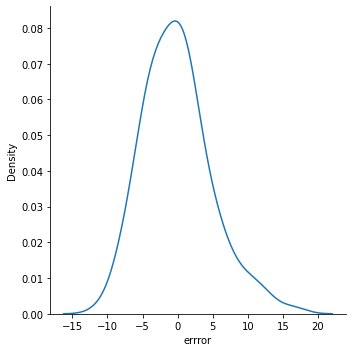

In [15]:
sns.displot(data=test_df, x='errror', kind = 'kde')